##### Loading the required packages

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##### Loading the Q1 sample CRASH dataset for further analysis of features.

In [3]:
# sheetname = ["CRASH", "PERSON", "VEHICLE", "EMS", "CIRCUM_PERSON", "CIRCUM_VEHICLE", "CIRCUM_ROAD", "CIRCUM_WEATHER"]
dateparse = lambda x: pd.datetime.strptime(x, '%m-%d-%Y %H:%M:%S')


def getData(filePath):
    crash = pd.read_excel(filePath, parse_dates={'datetime': ['ACC_DATE', 'ACC_TIME']},date_parser=dateparse,
                          sheet_name = "CRASH",na_values=['?', -99999])
    #person = pd.read_excel(filePath, sheet_name = "PERSON",na_values=['?', -99999])
    #vehicle = pd.read_excel(filePath, sheet_name = "VEHICLE",na_values=['?', -99999])
    #ems = pd.read_excel(filePath, sheet_name = "EMS",na_values=['?', -99999])
    #circumperson = pd.read_excel(filePath, sheet_name = "CIRCUM_PERSON",na_values=['?', -99999])
    #circumvehicle = pd.read_excel(filePath, sheet_name = "CIRCUM_VEHICLE",na_values=['?', -99999])
    #circumroad = pd.read_excel(filePath, sheet_name = "CIRCUM_ROAD",na_values=['?', -99999])
    #circumweather = pd.read_excel(filePath, sheet_name = "CIRCUM_WEATHER",na_values=['?', -99999])
    
    #abc = crash.merge(circumweather, left_on='REPORT_NO', right_on='REPORT_NO', how='left')
    
    #crash.join(person,on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="person")
    #crash.join(vehicle, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="vehicle")
    #crash.join(ems, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="ems")
    #crash.join(circumperson,on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="circumperson")
    #crash.join(circumvehicle, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="circumvehicle")
    #crash.join(circumroad, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="circumroad")
    #abc = crash.join(circumweather, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="circumweather")
    
    return crash
    

data_Q1_CRASH = getData("./data/CrashData/Crash_Qtr01_2016.xlsx")
data_Q2_CRASH = getData("./data/CrashData/Crash_Qtr02_2016.xlsx")
data_Q3_CRASH = getData("./data/CrashData/Crash_Qtr03_2016.xlsx")
#data_Q4_CRASH = getData("./data/CrashData/Crash_Qtr04_2016.xlsx")

frames = [data_Q1_CRASH, data_Q2_CRASH, data_Q3_CRASH]
data = pd.concat(frames)
data.index = pd.to_datetime(data.datetime)
#del data["datetime"]
#data_Q1_CRASH.to_csv("data_Q1_CRASH.csv")
#data_Q2_CRASH.to_csv("data_Q2_CRASH.csv")
#data_Q3_CRASH.to_csv("data_Q3_CRASH.csv")
#data_Q4_CRASH.to_csv("data_Q4_CRASH.csv")
data.to_csv("alldata.csv")

In [4]:
data.describe()

,LIGHT_CODE,COUNTY_NO,MUNI_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_CODE,RD_DIV_CODE,FIX_OBJ_CODE,WEATHER_CODE,HARM_EVENT_CODE1,HARM_EVENT_CODE2,RTE_NO,LOG_MILE,DISTANCE,REFERENCE_NO,LATITUDE,LONGITUDE
count,87263.000000,87263.000000,68514.000000,78431.000000,87263.000000,78431.000000,65932.000000,78431.000000,78431.000000,87263.000000,87263.000000,87263.000000,87263.000000,68562.000000,78430.000000,70023.000000,68555.000000,87263.000000,87263.000000
mean,4.495779,13.580085,148.355095,2.438795,21.150637,3.021489,1.465980,1.996838,4.400875,4.214062,6.560224,3.815110,2.182452,995.950716,4.534828,75.562658,1266.783152,39.158365,-76.732175
std,15.667279,8.130468,342.458226,8.853467,30.132101,10.847870,0.785486,9.542572,13.327386,14.912566,11.407713,8.704703,7.944186,1637.867411,6.939936,152.824669,1922.328846,0.302362,0.456703
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.779000,-79.803998
25%,1.000000,3.000000,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,6.010000,1.000000,0.000000,92.000000,0.170000,0.000000,40.000000,38.998589,-76.927447
50%,1.000000,15.000000,0.000000,1.000000,11.000000,2.000000,1.000000,1.000000,2.000000,0.000000,6.010000,1.000000,0.000000,270.000000,1.450000,5.000000,345.000000,39.264611,-76.680257
75%,3.000000,22.000000,13.000000,2.000000,17.000000,2.000000,2.000000,1.000000,4.000000,0.000000,6.010000,2.000000,1.000000,1035.000000,5.870000,80.000000,1630.000000,39.342389,-76.577716
max,99.000000,24.000000,999.000000,99.000000,99.000000,99.000000,10.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9901.000000,50.000000,999.000000,9902.000000,39.968701,-75.011404


Text(0.5,1,u'Breakdown of Report Type for Accidents.')

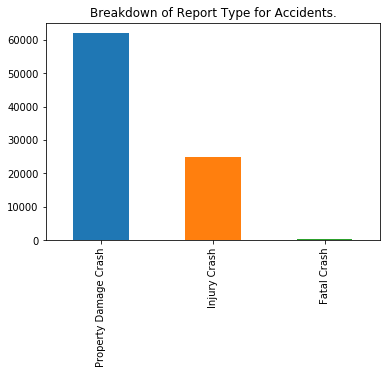

In [5]:
data["REPORT_TYPE"].value_counts().plot(kind='bar')
plt.title("Breakdown of Report Type for Accidents.")

Text(0.5,1,u'Breakdown of Accidents by County Info')

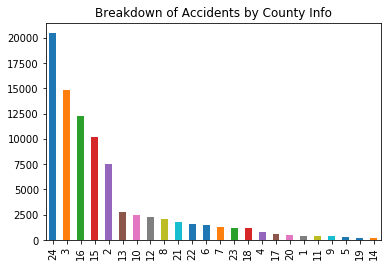

In [6]:
data["COUNTY_NO"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by County Info")

Text(0.5,1,u'Breakdown of Accidents by Weather Conditions')

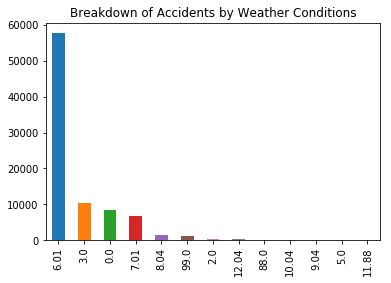

In [7]:
data["WEATHER_CODE"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Weather Conditions")

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


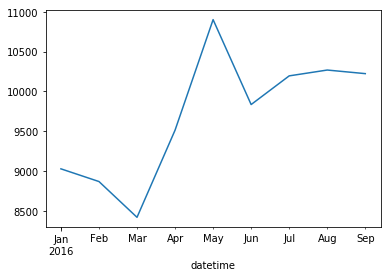

In [9]:
data["REPORT_TYPE"].resample('M', how='count').plot()
# Count of number of accidents with time. 

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


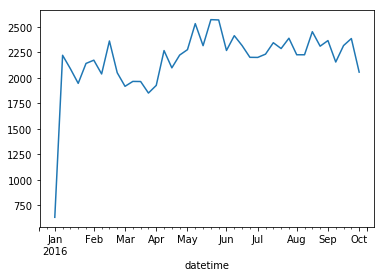

In [10]:
data["REPORT_TYPE"].resample('W', how='count').plot()
# Count of number of accidents with time. 

Text(0.5,1,u'Breakdown of Accidents by Hour')

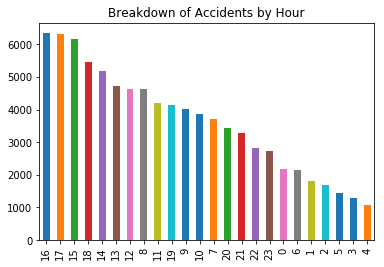

In [11]:
data['hour'] = data.index.hour
data["hour"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Hour")

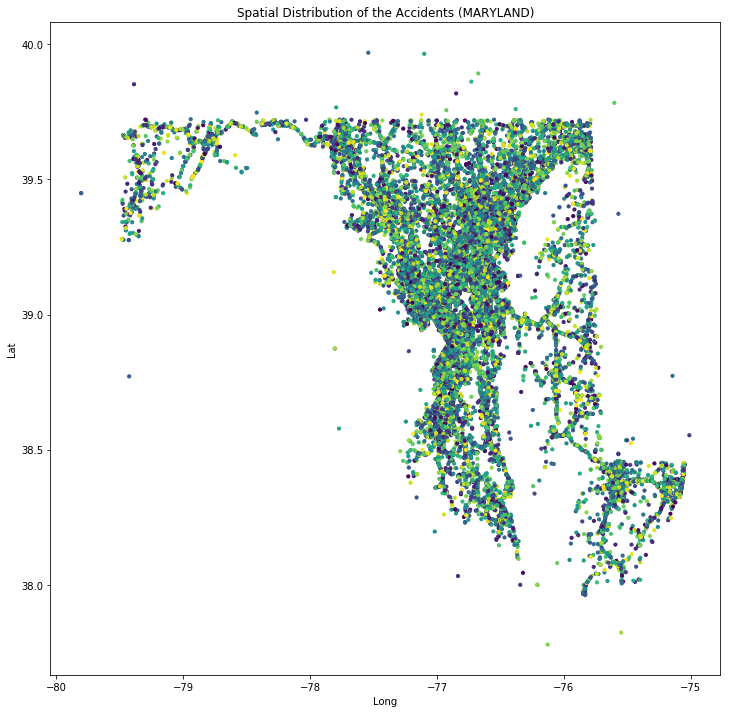

In [12]:
## Plot the accidents information from LatLong.
#temp = data_Q1_CRASH[data_Q1_CRASH["REPORT_TYPE"] != "Property Damage Crash"]
temp = data
colors = np.random.rand(temp.shape[0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(temp["LONGITUDE"],temp["LATITUDE"],c=colors,s=10)
plt.title("Spatial Distribution of the Accidents (MARYLAND)")
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

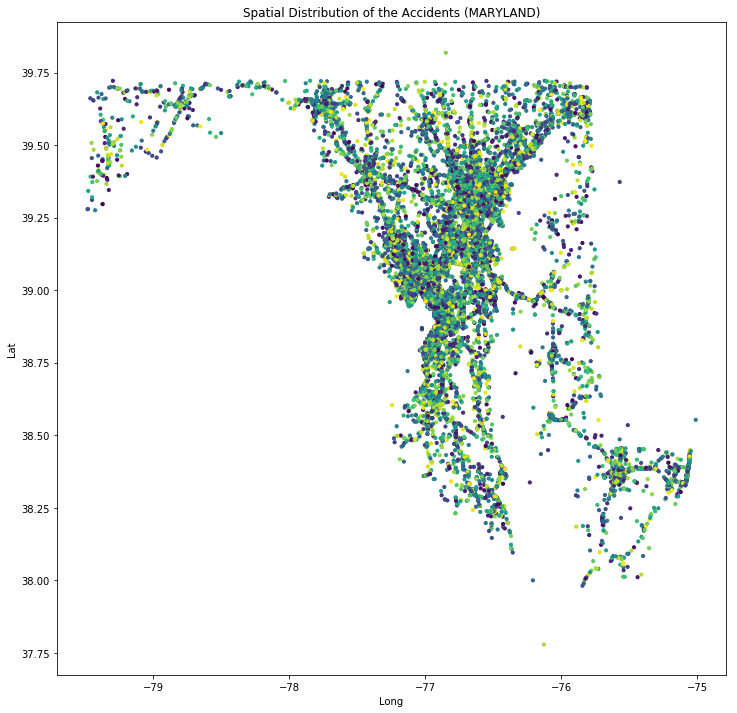

In [10]:
## Plot the accidents information from LatLong.
temp = data[data["REPORT_TYPE"] != "Property Damage Crash"]
#temp = data_Q1_CRASH
colors = np.random.rand(temp.shape[0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(temp["LONGITUDE"],temp["LATITUDE"],c=colors,s=10)
plt.title("Spatial Distribution of the Accidents (MARYLAND)")
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

For the plot it looks like it as mostly spread around all the state...

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


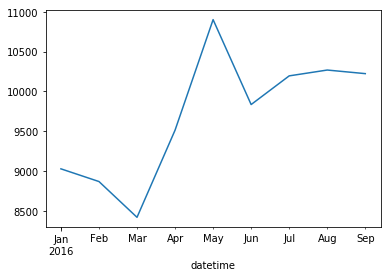

In [13]:
temp["REPORT_TYPE"].resample('M', how='count').plot()
# Count of number of accidents with time. 

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


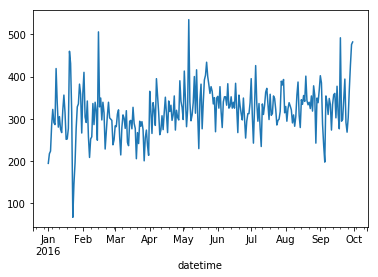

In [14]:
temp["REPORT_TYPE"].resample('D', how='count').plot()
# Count of number of accidents with time. 

Text(0.5,1,u'Breakdown of Accidents by Hour')

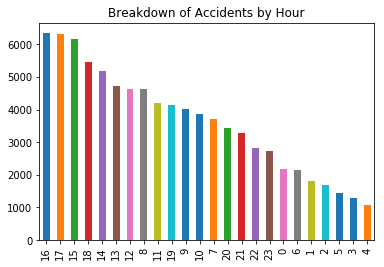

In [15]:
temp['hour'] = temp.index.hour
temp["hour"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Hour")

Text(0.5,1,u'Breakdown of Accidents by WeekDay')

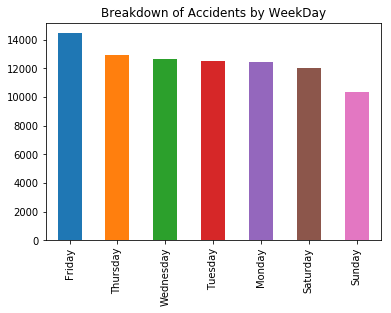

In [16]:
data['weekday'] = data.index.weekday_name
data["weekday"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by WeekDay")

#### This code is not used as we are not mapping accidents to Grid Cells

import shapefile as shp
import math

minx,maxx,miny,maxy = -80,-74,37.75,39.75
dx = .1
dy = .1

nx = int(math.ceil(abs(maxx - minx)/dx))
ny = int(math.ceil(abs(maxy - miny)/dy))

w = shp.Writer(shp.POLYGON)
w.autoBalance = 1
w.field("ID")
id=0

for i in range(ny):
    for j in range(nx):
        id+=1
        vertices = []
        parts = []
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*(i+1),miny)])
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*(i+1),miny)])
        parts.append(vertices)
        w.poly(parts)
        w.record(id)

w.save('grid.shp')

import geopandas as gpd
shapefilepath = "./grid.shp"
gridsLayer = gpd.read_file(shapefilepath)
f, ax = plt.subplots(1, figsize=(12, 12))
ax = gridsLayer.plot(axes=ax,colormap='Greens')
plt.show()

/Users/212475040/anaconda/lib/python2.7/site-packages/geopandas/plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/Users/212475040/anaconda/lib/python2.7/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


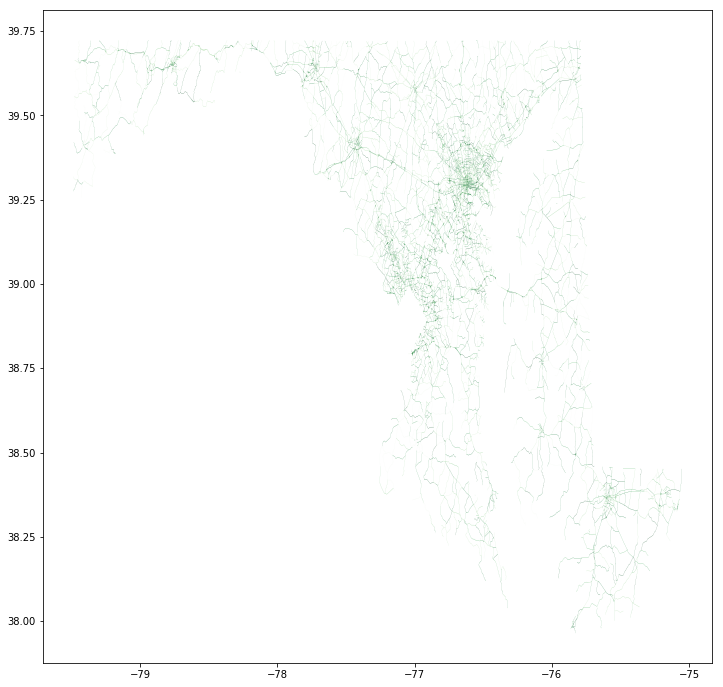

In [17]:
import geopandas as gpd
shapefilepath = "./data/BufferedRoadNetwork/buffer3.shp"
roadnetworkwithbuffer = gpd.read_file(shapefilepath)
f, ax = plt.subplots(1, figsize=(12, 12))
ax = roadnetworkwithbuffer.plot(axes=ax,colormap='Greens')
plt.show()

In [18]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(data.LONGITUDE, data.LATITUDE)]
crs = {'init': 'epsg:4326'}
accidents_data = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

In [19]:
from geopandas.tools import sjoin
crash_WithRoadInfo = sjoin(accidents_data,roadnetworkwithbuffer, how="inner", op='intersects')

In [20]:
print accidents_data.shape
print crash_WithRoadInfo.shape
print roadnetworkwithbuffer.shape

(87263, 39)
(94157, 125)
(10581, 86)


Text(0.5,1,u"Breakdown of Accidents by Road's")

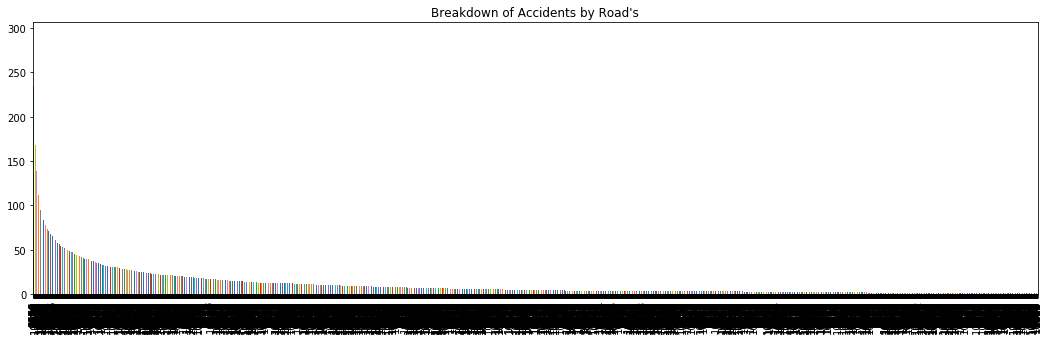

In [21]:
plt.figure(figsize=(18, 5), dpi=80)
crash_WithRoadInfo["OBJECT_ID"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Road's")

Text(0.5,1,u"Breakdown of Accidents by Road's")

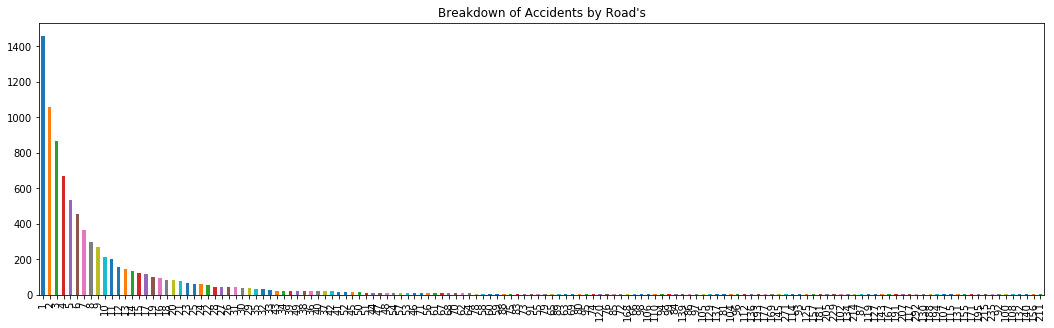

In [22]:
plt.figure(figsize=(18, 5), dpi=80)
crash_WithRoadInfo["OBJECT_ID"].value_counts().value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Road's")

In [25]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [29]:
#### Some basic code cleanup
crash_WithRoadInfo["LIGHT_CODE_Coded"] = coding(crash_WithRoadInfo["LIGHT_CODE"], 
                                                {0:"Not Applicable",
                                                 1:"Daylight",
                                                 3:"Dark Lights On",
                                                 4:"Dark No Lights",
                                                 5:"Dawn",
                                                 6:"Dusk",
                                                 7:"Dark - Unknown Lighting",
                                                 88:"Other",
                                                 99:"Unknown"})
crash_WithRoadInfo["SURF_COND_CODE"] = coding(crash_WithRoadInfo["SURF_COND_CODE"], 
                                                {0:"Not Applicable",
                                                 1:"Wet",
                                                 2:"Dry",
                                                 3:"Snow",
                                                 4:"Ice",
                                                 5:"Mud, Dirt, Gravel",
                                                 6:"Slush",
                                                 7:"Water (standing/moving)",
                                                 8:"Sand",
                                                 9:"Oil",
                                                 88:"Other",
                                                 99:"Unknown"})
crash_WithRoadInfo["RD_COND_CODE"] = coding(crash_WithRoadInfo["RD_COND_CODE"], 
                                                {0:"Not Applicable",
                                                 1:"No Defects",
                                                 2:"Shoulder Defect",
                                                 3:"Holes, Ruts, Etc.",
                                                 4:"Foreign Material",
                                                 5:"Loose Surface Material",
                                                 6:"Obstruction Not Lighted",
                                                 7:"Obstruction Not Signaled",
                                                 8:"View Obstructed",
                                                 88:"Other"})
crash_WithRoadInfo["WEATHER_CODE"] = coding(crash_WithRoadInfo["WEATHER_CODE"], 
                                                {0:"Not Applicable",
                                                 2:"Foggy",
                                                 3:"Raining",
                                                 5:"Severe Winds",
                                                 6.01:"Clear",
                                                 7.01:"Cloudy",
                                                 8.04:"Snow",
                                                 9.04:"Sleet",
                                                 10.04:"Blowing Snow",
                                                 11.88:"Blowing Sand, Soil, Dirt",
                                                 12.04:"Wintry Mix",
                                                 88:"Other",
                                                 99:"Unknown"})

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15eee3510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1765f87d0>]], dtype=object)

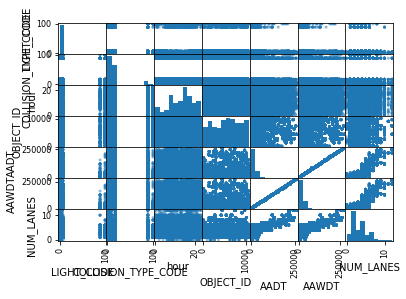

In [36]:
#featuresSet = crash_WithRoadInfo[["LIGHT_CODE",
#"COLLISION_TYPE_CODE",
#"SURF_COND_CODE",
#"RD_COND_CODE","WEATHER_CODE","SIGNAL_FLAG",
#"C_M_ZONE_FLAG","AGENCY_CODE",
#"AREA_CODE","HARM_EVENT_CODE1",
#"HARM_EVENT_CODE2","LATITUDE",
#"LONGITUDE","hour",
#"weekday","OBJECT_ID",
#"AADT",
#"AAWDT","MOTORCYCLE",
#"CAR_AADT","LIGHT_TRUC",
#"BUS_AADT","SINGLE_UNI",
#"COMBINATIO","NUM_LANES"]]

from pandas.tools import plotting
plt.figure(figsize=(16, 16), dpi=100)
plotting.scatter_matrix(crash_WithRoadInfo[["LIGHT_CODE",
"COLLISION_TYPE_CODE",
"SURF_COND_CODE",
"RD_COND_CODE","WEATHER_CODE","SIGNAL_FLAG","hour",
"weekday","OBJECT_ID",
"AADT",
"AAWDT","MOTORCYCLE",
"CAR_AADT","LIGHT_TRUC",
"BUS_AADT","SINGLE_UNI",
"COMBINATIO","NUM_LANES"]])

In [58]:
featuresSet = crash_WithRoadInfo[["datetime","LIGHT_CODE",
"COLLISION_TYPE_CODE",
"SURF_COND_CODE",
"RD_COND_CODE","WEATHER_CODE","SIGNAL_FLAG","hour",
"weekday","OBJECT_ID",
"AADT",
"AAWDT","MOTORCYCLE",
"CAR_AADT","LIGHT_TRUC",
"BUS_AADT","SINGLE_UNI",
"COMBINATIO","NUM_LANES"]]

In [60]:
featuresSet["hour"] = coding(featuresSet["hour"],{1:"Night",
                                                 2:"Night",
                                                 3:"Night",
                                                 5:"Night",
                                                 6:"Night",
                                                 7:"Morning",
                                                 8:"Morning",
                                                 9:"Morning",
                                                 10:"Morning",
                                                 11:"Afternoon",
                                                 12:"Afternoon",
                                                 13:"Afternoon",
                                                 14:"Afternoon",
                                                 15:"Afternoon",
                                                 16:"Evening",
                                                 17:"Evening",
                                                 18:"Evening",
                                                 19:"Evening",
                                                 20:"Evening",
                                                 21:"Evening",
                                                 22:"Night",
                                                 23:"Night",
                                                 0:"Night"})
featuresSet["date"] = featuresSet.datetime.dt.month

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
featuresSet.to_csv("./featuresSet.csv")

In [75]:
featuresSet["month"] = featuresSet.datetime.dt.month
featuresSet.columns

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Index([           u'datetime',          u'LIGHT_CODE', u'COLLISION_TYPE_CODE',
            u'SURF_COND_CODE',        u'RD_COND_CODE',        u'WEATHER_CODE',
               u'SIGNAL_FLAG',                u'hour',             u'weekday',
                 u'OBJECT_ID',                u'AADT',               u'AAWDT',
                u'MOTORCYCLE',            u'CAR_AADT',          u'LIGHT_TRUC',
                  u'BUS_AADT',          u'SINGLE_UNI',          u'COMBINATIO',
                 u'NUM_LANES',                u'date',               u'month'],
      dtype='object')

In [77]:
featuresSet.groupby(["OBJECT_ID","month","AADT","AAWDT"]).size()

featuresSet = crash_WithRoadInfo[["datetime",
"COLLISION_TYPE_CODE",
"AADT",
"AAWDT","NUM_LANES"]]

OBJECT_ID  month  AADT    AAWDT 
1          1      14660   15690      1
           2      14660   15690      1
           4      14660   15690      1
           6      14660   15690      3
2          1      1051    1131       1
3          2      79490   85050      1
           4      79490   85050      1
           6      79490   85050      1
           8      79490   85050      1
4          4      16660   17500      1
           5      16660   17500      1
           6      16660   17500      1
           9      16660   17500      1
5          2      693     743        1
           5      693     743        1
           7      693     743        1
           9      693     743        1
6          1      23350   24990      7
           2      23350   24990      4
           3      23350   24990      4
           4      23350   24990      7
           5      23350   24990      8
           6      23350   24990      6
           7      23350   24990      9
           8      23350   24990

In [78]:
featuresSet1 = crash_WithRoadInfo[["datetime","OBJECT_ID",
"COLLISION_TYPE_CODE",
"AADT",
"AAWDT","NUM_LANES"]]
featuresSet1["month"] = featuresSet1.datetime.dt.month
featuresSet2 = featuresSet1.groupby(["OBJECT_ID","COLLISION_TYPE_CODE","month","AADT","AAWDT","NUM_LANES"]).size()

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [87]:
featuresSet2 = featuresSet1.groupby(["OBJECT_ID","COLLISION_TYPE_CODE","month","AADT","AAWDT","NUM_LANES"]).size().to_frame(name = 'count').reset_index()

In [88]:
featuresSet2.head

<bound method DataFrame.head of        OBJECT_ID  COLLISION_TYPE_CODE  month   AADT  AAWDT  NUM_LANES  count
0              1                    3      1  14660  15690          3      1
1              1                    3      4  14660  15690          3      1
2              1                    3      6  14660  15690          3      2
3              1                    7      2  14660  15690          3      1
4              1                    9      6  14660  15690          3      1
5              2                    8      1   1051   1131          1      1
6              3                    3      4  79490  85050          6      1
7              3                    3      8  79490  85050          6      1
8              3                    7      2  79490  85050          6      1
9              3                   17      6  79490  85050          6      1
10             4                    1      5  16660  17500          2      1
11             4                    3      6

In [89]:
# Split Dataframe to Train/Test Split
msk = np.random.rand(len(featuresSet2)) < 0.8
train = featuresSet2[msk]
test = featuresSet2[~msk]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
...                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
print(regr.feature_importances_)
print(regr.predict([[0, 0, 0, 0]]))

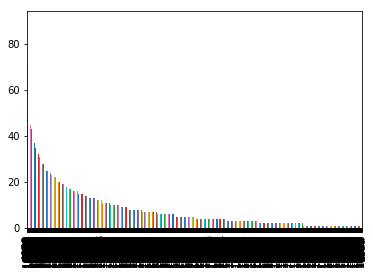

In [95]:
featuresSet2["OBJECT_ID"].value_counts().plot(kind='bar')